<div align="center"><h1>Accelerating Applications with CUDA C/C++</h1></div>

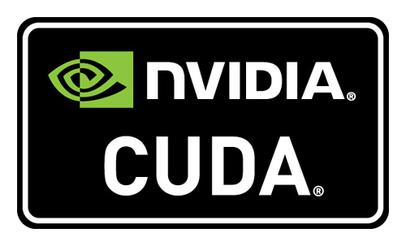

Accelerated computing is replacing CPU-only computing as best practice. The parade of breakthroughs driven by accelerated computing, the ever increasing demand for accelerated applications, programming conventions that ease writing them, and constant improvements in the hardware that supports them, are driving this inevitable transition.

At the center of accelerated computing's success, both in terms of its impressive performance, and its ease of use, is the [CUDA](https://developer.nvidia.com/about-cuda) compute platform. CUDA provides a coding paradigm that extends languages like C, C++, Python, and Fortran, to be capable of running accelerated, massively parallelized code on the world's most performant parallel processors: NVIDIA GPUs. CUDA accelerates applications drastically with little effort, has an ecosystem of highly optimized libraries for [DNN](https://developer.nvidia.com/cudnn), [BLAS](https://developer.nvidia.com/cublas), [graph analytics](https://developer.nvidia.com/nvgraph), [FFT](https://developer.nvidia.com/cufft), and more, and also ships with powerful [command line and visual profilers](https://developer.nvidia.com/nsight-systems).

CUDA supports many, if not most, of the [world's most performant applications](https://www.nvidia.com/en-us/data-center/gpu-accelerated-applications/catalog/?product_category_id=58,59,60,293,98,172,223,227,228,265,487,488,114,389,220,258,461&search=) in: [Computational Fluid Dynamics](https://www.nvidia.com/en-us/data-center/gpu-accelerated-applications/catalog/?product_category_id=10,12,16,17,19,51,53,71,87,121,124,156,157,195,202,203,204,312,339,340,395,407,448,485,517,528,529,541,245,216,104,462,513,250,492,420,429,490,10,12,16,17,19,51,53,71,87,121,124,156,157,195,202,203,204,312,339,340,395,407,448,485,517,528,529,541,245,216,104,462,513,250,492,420,429,490,10,12,16,17,19,51,53,71,87,121,124,156,157,195,202,203,204,312,339,340,395,407,448,485,517,528,529,541,245,216,104,462,513,250,492,420,429,490&search=), [Molecular Dynamics](https://www.nvidia.com/en-us/data-center/gpu-accelerated-applications/catalog/?product_category_id=8,57,92,123,211,213,237,272,274,282,283,307,325,337,344,345,351,362,365,380,396,398,400,435,507,508,519,8,57,92,123,211,213,237,272,274,282,283,307,325,337,344,345,351,362,365,380,396,398,400,435,507,508,519,8,57,92,123,211,213,237,272,274,282,283,307,325,337,344,345,351,362,365,380,396,398,400,435,507,508,519,8,57,92,123,211,213,237,272,274,282,283,307,325,337,344,345,351,362,365,380,396,398,400,435,507,508,519&search=), [Quantum Chemistry](https://www.nvidia.com/en-us/data-center/gpu-accelerated-applications/catalog/?product_category_id=8,57,92,123,211,213,237,272,274,282,283,307,325,337,344,345,351,362,365,380,396,398,400,435,507,508,519,8,57,92,123,211,213,237,272,274,282,283,307,325,337,344,345,351,362,365,380,396,398,400,435,507,508,519&search=), [Physics](https://www.nvidia.com/en-us/data-center/gpu-accelerated-applications/catalog/?product_category_id=6,24,116,118,119,135,229,231,372,373,392,393,489,493,494,495,496,497,498,67,170,216,281,6,24,116,118,119,135,229,231,372,373,392,393,489,493,494,495,496,497,498,67,170,216,281,6,24,116,118,119,135,229,231,372,373,392,393,489,493,494,495,496,497,498,67,170,216,281,6,24,116,118,119,135,229,231,372,373,392,393,489,493,494,495,496,497,498,67,170,216,281,6,24,116,118,119,135,229,231,372,373,392,393,489,493,494,495,496,497,498,67,170,216,281&search=) and HPC.

Learning CUDA will enable you to accelerate your own applications. Accelerated applications perform much faster than their CPU-only counterparts, and make possible computations that would be otherwise prohibited given the limited performance of CPU-only applications. In this lab you will receive an introduction to programming accelerated applications with CUDA C/C++, enough to be able to begin work accelerating your own CPU-only applications for performance gains, and for moving into novel computational territory.

---
## Prerequisites

To get the most out of this lab you should already be able to:

- Declare variables, write loops, and use if / else statements in C.
- Define and invoke functions in C.
- Allocate arrays in C.

No previous CUDA knowledge is required.

---
## Objectives

By the time you complete this lab, you will be able to:

- Write, compile, and run C/C++ programs that both call CPU functions and **launch** GPU **kernels**.
- Control parallel **thread hierarchy** using **execution configuration**.
- Refactor serial loops to execute their iterations in parallel on a GPU.
- Allocate and free memory available to both CPUs and GPUs.
- Handle errors generated by CUDA code.
- Accelerate CPU-only applications.

---
## Accelerated Systems

*Accelerated systems*, also referred to as *heterogeneous systems*, are those composed of both CPUs and GPUs. Accelerated systems run CPU programs which in turn, launch functions that will benefit from the massive parallelism provided by GPUs. This lab environment is an accelerated system which includes an NVIDIA GPU. Information about this GPU can be queried with the `nvidia-smi` (*Systems Management Interface*) command line command. Issue the `nvidia-smi` command now, by `CTRL` + `ENTER` on the code execution cell below. You will find these cells throughout this lab any time you need to execute code. The output from running the command will be printed just below the code execution cell after the code runs. After running the code execution block immediately below, take care to find and note the name of the GPU in the output.

In [1]:
!nvidia-smi

Wed Jan 29 13:56:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.77.01              Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        On  |   00000000:2B:00.0  On |                  N/A |
|  0%   36C    P8             15W /  200W |    1540MiB /  12282MiB |     17%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

---

## GPU-accelerated Vs. CPU-only Applications

The following video presents upcoming material visually, at a high level. Click watch it before moving on to more detailed coverage of their topics in following sections.

<script>console.log('hi');</script>

In [2]:
from IPython.display import HTML

video_url = "https://d36m44n9vdbmda.cloudfront.net/assets/s-ac-04-v1/task1/AC_CUDA_C_1.mp4"

video_html = f"""
<video controls width="640" height="360">
    <source src="{video_url}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

display(HTML(video_html))

---
## Writing Application Code for the GPU

CUDA provides extensions for many common programming languages, in the case of this lab, C/C++. These language extensions easily allow developers to run functions in their source code on a GPU.

Below is a .cu file (.cu is the file extension for CUDA-accelerated programs). It contains two functions, the first which will run on the CPU, the second which will run on the GPU. Spend a little time identifying the differences between the functions, both in terms of how they are defined, and how they are invoked.

```cpp
void CPUFunction()
{
  printf("This function is defined to run on the CPU.\n");
}

__global__ void GPUFunction()
{
  printf("This function is defined to run on the GPU.\n");
}

int main()
{
  CPUFunction();

  GPUFunction<<<1, 1>>>();
  cudaDeviceSynchronize();
}
```

Here are some important lines of code to highlight, as well as some other common terms used in accelerated computing:

`__global__ void GPUFunction()`
  - The `__global__` keyword indicates that the following function will run on the GPU, and can be invoked **globally**, which in this context means either by the CPU, or, by the GPU.
  - Often, code executed on the CPU is referred to as **host** code, and code running on the GPU is referred to as **device** code.
  - Notice the return type `void`. It is required that functions defined with the `__global__` keyword return type `void`.

`GPUFunction<<<1, 1>>>();`
  - Typically, when calling a function to run on the GPU, we call this function a **kernel**, which is **launched**.
  - When launching a kernel, we must provide an **execution configuration**, which is done by using the `<<< ... >>>` syntax just prior to passing the kernel any expected arguments.
  - At a high level, execution configuration allows programmers to specify the **thread hierarchy** for a kernel launch, which defines the number of thread groupings (called **blocks**), as well as how many **threads** to execute in each block. Execution configuration will be explored at great length later in the lab, but for the time being, notice the kernel is launching with `1` block of threads (the first execution configuration argument) which contains `1` thread (the second configuration argument).

`cudaDeviceSynchronize();`
  - Unlike much C/C++ code, launching kernels is **asynchronous**: the CPU code will continue to execute *without waiting for the kernel launch to complete*.
  - A call to `cudaDeviceSynchronize`, a function provided by the CUDA runtime, will cause the host (CPU) code to wait until the device (GPU) code completes, and only then resume execution on the CPU.

---
### Exercise: Write a Hello GPU Kernel

The [01-hello-gpu.cu](01-hello/01-hello-gpu.cu) (*<---- click on the link of the source file to open it in another tab for editing*) contains a program that is already working. It contains two functions, both with print "Hello from the CPU" messages. Your goal is to refactor the `helloGPU` function in the source file so that it actually runs on the GPU, and prints a message indicating that it does.

- Refactor the application, before compiling and running it with the `nvcc` command just below (remember, you can execute the contents of the code execution cell by `CTRL + ENTER` it). The comments in [01-hello-gpu.cu](01-hello/01-hello-gpu.cu) will assist your work. If you get stuck, or want to check your work, refer to the [solution](01-hello/solutions/01-hello-gpu-solution.cu). Don't forget to save your changes to the file before compiling and running with the command below.

In [20]:
!nvcc -o hello-gpu 01-hello-gpu.cu -run

Hello from the CPU.
Hello from the GPU.


After successfully refactoring [01-hello-gpu.cu](01-hello/01-hello-gpu.cu), make the following modifications, attempting to compile and run it after each change (by `CTRL + ENTER` clicking on the code execution cell above). When given errors, take the time to read them carefully: familiarity with them will serve you greatly when you begin writing your own accelerated code.

- Remove the keyword `__global__` from your kernel definition. Take care to note the line number in the error: what do you think is meant in the error by "configured"? Replace `__global__` when finished.
- Remove the execution configuration: does your understanding of "configured" still make sense? Replace the execution configuration when finished.
- Remove the call to `cudaDeviceSynchronize`. Before compiling and running the code, take a guess at what will happen, recalling that kernels are launched asynchronously, and that `cudaDeviceSynchronize` is what makes host execution in wait for kernel execution to complete before proceeding. Replace the call to `cudaDeviceSynchronize` when finished.
- Refactor 01-hello-gpu.cu so that `Hello from the GPU` prints **before** `Hello from the CPU`.
- Refactor 01-hello-gpu.cu so that `Hello from the GPU` prints **twice**, once  **before** `Hello from the CPU`, and once **after**.

---
### Compiling and Running Accelerated CUDA Code

This section contains details about the `nvcc` command you issued above to compile and run your .cu program.

The CUDA platform ships with the [**NVIDIA CUDA Compiler**](http://docs.nvidia.com/cuda/cuda-compiler-driver-nvcc/index.html) `nvcc`, which can compile CUDA accelerated applications, both the host, and the device code they contain. For the purposes of this lab, `nvcc` discussion will be pragmatically scoped to suit our immediate needs. After completing the lab anyone interested in a deeper dive into `nvcc` can start with [the documentation](http://docs.nvidia.com/cuda/cuda-compiler-driver-nvcc/index.html).

`nvcc` will be very familiar to experienced `gcc` users. Compiling, for example, a some-CUDA.cu file, is simply:

`nvcc -o out some-CUDA.cu -run`
  - `nvcc` is the command line command for using the `nvcc` compiler.
  - some-CUDA.cu is passed as the file to compile.
  - The `o` flag is used to specify the output file for the compiled program.
  - As a matter of convenience, providing the `run` flag will execute the successfully compiled binary.

---

## CUDA Thread Hierarchy

The following video presents upcoming material visually, at a high level. Click watch it before moving on to more detailed coverage of their topics in following sections.

<script>console.log('hi');</script>

In [4]:
from IPython.display import HTML

video_url = "https://d36m44n9vdbmda.cloudfront.net/assets/s-ac-04-v1/task1/AC_CUDA_C_2.mp4"

video_html = f"""
<video controls width="640" height="360">
    <source src="{video_url}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

display(HTML(video_html))

---
## Launching Parallel Kernels

The execution configuration allows programmers to specify details about launching the kernel to run in parallel on multiple GPU **threads**. More precisely, the execution configuration allows programmers to specify how many groups of threads - called **thread blocks**, or just **blocks** - and how many threads they would like each thread block to contain. The syntax for this is:

`<<< NUMBER_OF_BLOCKS, NUMBER_OF_THREADS_PER_BLOCK>>>`

** The kernel code is executed by every thread in every thread block configured when the kernel is launched**.

Thus, under the assumption that a kernel called `someKernel` has been defined, the following are true:
  - `someKernel<<<1, 1>>>()` is configured to run in a single thread block which has a single thread and will therefore run only once.
  - `someKernel<<<1, 10>>>()` is configured to run in a single thread block which has 10 threads and will therefore run 10 times.
  - `someKernel<<<10, 1>>>()` is configured to run in 10 thread blocks which each have a single thread and will therefore run 10 times.
  - `someKernel<<<10, 10>>>()` is configured to run in 10 thread blocks which each have 10 threads and will therefore run 100 times.

---
### Exercise: Launch Parallel Kernels

[01-first-parallel.cu](02-first-parallel/01-first-parallel.cu) currently makes a very basic function call that prints the message `This should be running in parallel.` Follow the steps below to refactor it first to run on the GPU, and then, in parallel, both in a single, and then, in multiple thread blocks. Refer to [the solution](02-first-parallel/solutions/01-first-parallel-solution.cu) if you get stuck.

- Refactor the `firstParallel` function to launch as a CUDA kernel on the GPU. You should still be able to see the output of the function after compiling and running 01-first-parallel.cu with the `nvcc` command just below.
- Refactor the `firstParallel` kernel to execute in parallel on 5 threads, all executing in a single thread block. You should see the output message printed 5 times after compiling and running the code.
- Refactor the `firstParallel` kernel again, this time to execute in parallel inside 5 thread blocks, each containing 5 threads. You should see the output message printed 25 times now after compiling and running.

In [21]:
!nvcc -o first-parallel 02-first-parallel.cu -run

This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.
This is running in parallel.


---

## CUDA-Provided Thread Hierarchy Variables

The following video presents upcoming material visually, at a high level. Click watch it before moving on to more detailed coverage of their topics in following sections.

<script>console.log('hi');</script>

In [6]:
from IPython.display import HTML

video_url = "https://d36m44n9vdbmda.cloudfront.net/assets/s-ac-04-v1/task1/AC_CUDA_C_3.mp4"

video_html = f"""
<video controls width="640" height="360">
    <source src="{video_url}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

display(HTML(video_html))

---
## Thread and Block Indices

Each thread is given an index within its thread block, starting at `0`. Additionally, each block is given an index, starting at `0`. Just as threads are grouped into thread blocks, blocks are grouped into a **grid**, which is the highest entity in the CUDA thread hierarchy. In summary, CUDA kernels are executed in a grid of 1 or more blocks, with each block containing the same number of 1 or more threads.

CUDA kernels have access to special variables identifying both the index of the thread (within the block) that is executing the kernel, and, the index of the block (within the grid) that the thread is within. These variables are `threadIdx.x` and `blockIdx.x` respectively.

---
### Exercise: Use Specific Thread and Block Indices

Currently the [01-thread-and-block-idx.cu](03-indices/01-thread-and-block-idx.cu) file contains a working kernel that is printing a failure message. Open the file to learn how to update the execution configuration so that the success message will print. After refactoring, compile and run the code with the code execution cell below to confirm your work. Refer to [the solution](03-indices/solutions/01-thread-and-block-idx-solution.cu) if you get stuck.

In [22]:
!nvcc -o thread-and-block-idx 03-thread-and-block-idx.cu -run

Success!


---
## Accelerating For Loops

For loops in CPU-only applications are ripe for acceleration: rather than run each iteration of the loop serially, each iteration of the loop can be run in parallel in its own thread. Consider the following for loop, and notice, though it is obvious, that it controls how many times the loop will execute, as well as defining what will happen for each iteration of the loop:

```cpp
int N = 2<<20;
for (int i = 0; i < N; ++i)
{
  printf("%d\n", i);
}
```

In order to parallelize this loop, 2 steps must be taken:

- A kernel must be written to do the work of a **single iteration of the loop**.
- Because the kernel will be agnostic of other running kernels, the execution configuration must be such that the kernel executes the correct number of times, for example, the number of times the loop would have iterated.

---
### Exercise: Accelerating a For Loop with a Single Block of Threads

Currently, the `loop` function inside [01-single-block-loop.cu](04-loops/01-single-block-loop.cu), runs a for loop that will serially print the numbers `0` through `9`. Refactor the `loop` function to be a CUDA kernel which will launch to execute `N` iterations in parallel. After successfully refactoring, the numbers `0` through `9` should still be printed. Refer to [the solution](04-loops/solutions/01-single-block-loop-solution.cu) if you get stuck.

In [ ]:
!nvcc -o single-block-loop 04-loops/01-single-block-loop.cu -run

cc1plus: fatal error: 04-single-block-loop.cu: No such file or directory
compilation terminated.


---

## Coordinating Parallel Threads

The following video presents upcoming material visually, at a high level. Click watch it before moving on to more detailed coverage of their topics in following sections.

<script>console.log('hi');</script>

In [9]:
from IPython.display import HTML

video_url = "https://d36m44n9vdbmda.cloudfront.net/assets/s-ac-04-v1/task1/AC_CUDA_C_4.mp4"

video_html = f"""
<video controls width="640" height="360">
    <source src="{video_url}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

display(HTML(video_html))

---
## Using Block Dimensions for More Parallelization

There is a limit to the number of threads that can exist in a thread block: 1024 to be precise. In order to increase the amount of parallelism in accelerated applications, we must be able to coordinate among multiple thread blocks.

CUDA Kernels have access to a special variable that gives the number of threads in a block: `blockDim.x`. Using this variable, in conjunction with `blockIdx.x` and `threadIdx.x`, increased parallelization can be accomplished by organizing parallel execution across multiple blocks of multiple threads with the idiomatic expression `threadIdx.x + blockIdx.x * blockDim.x`. Here is a detailed example.

The execution configuration `<<<10, 10>>>` would launch a grid with a total of 100 threads, contained in 10 blocks of 10 threads. We would therefore hope for each thread to have the ability to calculate some index unique to itself between `0` and `99`.

- If block `blockIdx.x` equals `0`, then `blockIdx.x * blockDim.x` is `0`. Adding to `0` the possible `threadIdx.x` values `0` through `9`, then we can generate the indices `0` through `9` within the 100 thread grid.
- If block `blockIdx.x` equals `1`, then `blockIdx.x * blockDim.x` is `10`. Adding to `10` the possible `threadIdx.x` values `0` through `9`, then we can generate the indices `10` through `19` within the 100 thread grid.
- If block `blockIdx.x` equals `5`, then `blockIdx.x * blockDim.x` is `50`. Adding to `50` the possible `threadIdx.x` values `0` through `9`, then we can generate the indices `50` through `59` within the 100 thread grid.
- If block `blockIdx.x` equals `9`, then `blockIdx.x * blockDim.x` is `90`. Adding to `90` the possible `threadIdx.x` values `0` through `9`, then we can generate the indices `90` through `99` within the 100 thread grid.

---
### Exercise: Accelerating a For Loop with Multiple Blocks of Threads

Currently, the `loop` function inside [02-multi-block-loop.cu](04-loops/02-multi-block-loop.cu) runs a for loop that will serially print the numbers `0` through `9`. Refactor the `loop` function to be a CUDA kernel which will launch to execute `N` iterations in parallel. After successfully refactoring, the numbers `0` through `9` should still be printed. For this exercise, as an additional constraint, use an execution configuration that launches *at least 2 blocks of threads.* Refer to [the solution](04-loops/solutions/02-multi-block-loop-solution.cu) if you get stuck.

In [10]:
!nvcc -o multi-block-loop 04-loops/02-multi-block-loop.cu -run

cc1plus: fatal error: 04-loops/02-multi-block-loop.cu: No such file or directory
compilation terminated.


---
## Allocating Memory to be accessed on the GPU and the CPU

More recent versions of CUDA (version 6 and later) have made it easy to allocate memory that is available to both the CPU host and any number of GPU devices, and while there are many [intermediate and advanced techniques](http://docs.nvidia.com/cuda/cuda-c-best-practices-guide/index.html#memory-optimizations) for memory management that will support the most optimal performance in accelerated applications, the most basic CUDA memory management technique we will now cover supports fantastic performance gains over CPU-only applications with almost no developer overhead.

To allocate and free memory, and obtain a pointer that can be referenced in both host and device code, replace calls to `malloc` and `free` with `cudaMallocManaged` and `cudaFree` as in the following example:

```cpp
// CPU-only

int N = 2<<20;
size_t size = N * sizeof(int);

int *a;
a = (int *)malloc(size);

// Use `a` in CPU-only program.

free(a);
```

```cpp
// Accelerated

int N = 2<<20;
size_t size = N * sizeof(int);

int *a;
// Note the address of `a` is passed as first argument.
cudaMallocManaged(&a, size);

// Use `a` on the CPU and/or on any GPU in the accelerated system.

cudaFree(a);
```

---
### Exercise: Array Manipulation on both the Host and Device

The [01-double-elements.cu](05-allocate/01-double-elements.cu) program allocates an array, initializes it with integer values on the host, attempts to double each of these values in parallel on the GPU, and then confirms whether or not the doubling operations were successful, on the host. Currently the program will not work: it is attempting to interact on both the host and the device with an array at pointer `a`, but has only allocated the array (using `malloc`) to be accessible on the host. Refactor the application to meet the following conditions, referring to [the solution](05-allocate/solutions/01-double-elements-solution.cu) if you get stuck:

- `a` should be available to both host and device code.
- The memory at `a` should be correctly freed.

In [11]:
!nvcc -o double-elements 05-allocate/01-double-elements.cu -run

cc1plus: fatal error: 05-allocate/01-double-elements.cu: No such file or directory
compilation terminated.


---

## Grid Size Work Amount Mismatch

The following video presents upcoming material visually, at a high level. Click watch it before moving on to more detailed coverage of their topics in following sections.

<script>console.log('hi');</script>

In [12]:
from IPython.display import HTML

video_url = "https://d36m44n9vdbmda.cloudfront.net/assets/s-ac-04-v1/task1/AC_CUDA_C_5.mp4"

video_html = f"""
<video controls width="640" height="360">
    <source src="{video_url}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

display(HTML(video_html))

---
## Handling Block Configuration Mismatches to Number of Needed Threads

It may be the case that an execution configuration cannot be expressed that will create the exact number of threads needed for parallelizing a loop.

A common example has to do with the desire to choose optimal block sizes. For example, due to GPU hardware traits, blocks that contain a number of threads that are a multiple of 32 are often desirable for performance benefits. Assuming that we wanted to launch blocks each containing 256 threads (a multiple of 32), and needed to run 1000 parallel tasks (a trivially small number for ease of explanation), then there is no number of blocks that would produce an exact total of 1000 threads in the grid, since there is no integer value 32 can be multiplied by to equal exactly 1000.

This scenario can be easily addressed in the following way:

- Write an execution configuration that creates **more** threads than necessary to perform the allotted work.
- Pass a value as an argument into the kernel (`N`) that represents to the total size of the data set to be processed, or the total threads that are needed to complete the work.
- After calculating the thread's index within the grid (using `tid+bid*bdim`), check that this index does not exceed `N`, and only perform the pertinent work of the kernel if it does not.

Here is an example of an idiomatic way to write an execution configuration when both `N` and the number of threads in a block are known, and an exact match between the number of threads in the grid and `N` cannot be guaranteed. It ensures that there are always at least as many threads as needed for `N`, and only 1 additional block's worth of threads extra, at most:

```cpp
// Assume `N` is known
int N = 100000;

// Assume we have a desire to set `threads_per_block` exactly to `256`
size_t threads_per_block = 256;

// Ensure there are at least `N` threads in the grid, but only 1 block's worth extra
size_t number_of_blocks = (N + threads_per_block - 1) / threads_per_block;

some_kernel<<<number_of_blocks, threads_per_block>>>(N);
```

Because the execution configuration above results in more threads in the grid than `N`, care will need to be taken inside of the `some_kernel` definition so that `some_kernel` does not attempt to access out of range data elements, when being executed by one of the "extra" threads:

```cpp
__global__ some_kernel(int N)
{
  int idx = threadIdx.x + blockIdx.x * blockDim.x;

  if (idx < N) // Check to make sure `idx` maps to some value within `N`
  {
    // Only do work if it does
  }
}
```

---
### Exercise: Accelerating a For Loop with a Mismatched Execution Configuration

The program in [02-mismatched-config-loop.cu](05-allocate/02-mismatched-config-loop.cu) allocates memory, using `cudaMallocManaged` for a 1000 element array of integers, and then seeks to initialize all the values of the array in parallel using a CUDA kernel. This program assumes that both `N` and the number of `threads_per_block` are known. Your task is to complete the following two objectives, refer to [the solution](05-allocate/solutions/02-mismatched-config-loop-solution.cu) if you get stuck:

- Assign a value to `number_of_blocks` that will make sure there are at least as many threads as there are elements in `a` to work on.
- Update the `initializeElementsTo` kernel to make sure that it does not attempt to work on data elements that are out of range.

In [13]:
!nvcc -o mismatched-config-loop 05-allocate/02-mismatched-config-loop.cu -run

cc1plus: fatal error: 05-allocate/02-mismatched-config-loop.cu: No such file or directory
compilation terminated.


---

## Grid-Stride Loops

The following video presents upcoming material visually, at a high level. Click watch it before moving on to more detailed coverage of their topics in following sections.

<script>console.log('hi');</script>

In [14]:
from IPython.display import HTML

video_url = "https://d36m44n9vdbmda.cloudfront.net/assets/s-ac-04-v1/task1/AC_CUDA_C_6.mp4"

video_html = f"""
<video controls width="640" height="360">
    <source src="{video_url}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

display(HTML(video_html))

---
## Data Sets Larger Than the Grid

Either by choice, often to create the most performant execution configuration, or out of necessity, the number of threads in a grid may be smaller than the size of a data set. Consider an array with 1000 elements, and a grid with 250 threads (using trivial sizes here for ease of explanation). Here, each thread in the grid will need to be used 4 times. One common method to do this is to use a **grid-stride loop** within the kernel.

In a grid-stride loop, each thread will calculate its unique index within the grid using `tid+bid*bdim`, perform its operation on the element at that index within the array, and then, add to its index the number of threads in the grid and repeat, until it is out of range of the array. For example, for a 500 element array and a 250 thread grid, the thread with index 20 in the grid would:

- Perform its operation on element 20 of the 500 element array
- Increment its index by 250, the size of the grid, resulting in 270
- Perform its operation on element 270 of the 500 element array
- Increment its index by 250, the size of the grid, resulting in 520
- Because 520 is now out of range for the array, the thread will stop its work

CUDA provides a special variable giving the number of blocks in a grid, `gridDim.x`. Calculating the total number of threads in a grid then is simply the number of blocks in a grid multiplied by the number of threads in each block, `gridDim.x * blockDim.x`. With this in mind, here is a verbose example of a grid-stride loop within a kernel:

```cpp
__global__ void kernel(int *a, int N)
{
  int indexWithinTheGrid = threadIdx.x + blockIdx.x * blockDim.x;
  int gridStride = gridDim.x * blockDim.x;

  for (int i = indexWithinTheGrid; i < N; i += gridStride)
  {
    // do work on a[i];
  }
}
```

---
### Exercise: Use a Grid-Stride Loop to Manipulate an Array Larger than the Grid

Refactor [03-grid-stride-double.cu](05-allocate/03-grid-stride-double.cu) to use a grid-stride loop in the `doubleElements` kernel, in order that the grid, which is smaller than `N`, can reuse threads to cover every element in the array. The program will print whether or not every element in the array has been doubled, currently the program accurately prints `FALSE`. Refer to [the solution](05-allocate/solutions/03-grid-stride-double-solution.cu) if you get stuck.

In [15]:
!nvcc -o grid-stride-double 05-allocate/03-grid-stride-double.cu -run

cc1plus: fatal error: 05-allocate/03-grid-stride-double.cu: No such file or directory
compilation terminated.


---
## Error Handling

As in any application, error handling in accelerated CUDA code is essential. Many, if not most CUDA functions (see, for example, the [memory management functions](http://docs.nvidia.com/cuda/cuda-runtime-api/group__CUDART__MEMORY.html#group__CUDART__MEMORY)) return a value of type `cudaError_t`, which can be used to check whether or not an error occurred while calling the function. Here is an example where error handling is performed for a call to `cudaMallocManaged`:

```cpp
cudaError_t err;
err = cudaMallocManaged(&a, N)                    // Assume the existence of `a` and `N`.

if (err != cudaSuccess)                           // `cudaSuccess` is provided by CUDA.
{
  printf("Error: %s\n", cudaGetErrorString(err)); // `cudaGetErrorString` is provided by CUDA.
}
```

Launching kernels, which are defined to return `void`, do not return a value of type `cudaError_t`. To check for errors occurring at the time of a kernel launch, for example if the launch configuration is erroneous, CUDA provides the `cudaGetLastError` function, which does return a value of type `cudaError_t`.

```cpp
/*
 * This launch should cause an error, but the kernel itself
 * cannot return it.
 */

someKernel<<<1, -1>>>();  // -1 is not a valid number of threads.

cudaError_t err;
err = cudaGetLastError(); // `cudaGetLastError` will return the error from above.
if (err != cudaSuccess)
{
  printf("Error: %s\n", cudaGetErrorString(err));
}
```

Finally, in order to catch errors that occur asynchronously, for example during the execution of an asynchronous kernel, it is essential to check the status returned by a subsequent synchronizing CUDA runtime API call, such as `cudaDeviceSynchronize`, which will return an error if one of the kernels launched previously should fail.

---
### Exercise: Add Error Handling

Currently [01-add-error-handling.cu](06-errors/01-add-error-handling.cu) compiles, runs, and prints that the elements of the array were not successfully doubled. The program does not, however, indicate that there are any errors within it. Refactor the application to handle CUDA errors so that you can learn what is wrong with the program and effectively debug it. You will need to investigate both synchronous errors potentially created when calling CUDA functions, as well as asynchronous errors potentially created while a CUDA kernel is executing. Refer to [the solution](06-errors/solutions/01-add-error-handling-solution.cu) if you get stuck.

In [16]:
!nvcc -o add-error-handling 06-errors/01-add-error-handling.cu -run

cc1plus: fatal error: 06-errors/01-add-error-handling.cu: No such file or directory
compilation terminated.


---
### CUDA Error Handling Function

It can be helpful to create a macro that wraps CUDA function calls for checking errors. Here is an example, feel free to use it in the remaining exercises:

```cpp
#include <stdio.h>
#include <assert.h>

inline cudaError_t checkCuda(cudaError_t result)
{
  if (result != cudaSuccess) {
    fprintf(stderr, "CUDA Runtime Error: %s\n", cudaGetErrorString(result));
    assert(result == cudaSuccess);
  }
  return result;
}

int main()
{

/*
 * The macro can be wrapped around any function returning
 * a value of type `cudaError_t`.
 */

  checkCuda( cudaDeviceSynchronize() )
}
```

---
## Summary

At this point in time you have accomplished all of the following lab objectives:

- Write, compile, and run C/C++ programs that both call CPU functions and **launch** GPU **kernels**.
- Control parallel **thread hierarchy** using **execution configuration**.
- Refactor serial loops to execute their iterations in parallel on a GPU.
- Allocate and free memory available to both CPUs and GPUs.
- Handle errors generated by CUDA code.

Now you will complete the final objective of the lab:

- Accelerate CPU-only applications.

---
### Final Exercise: Accelerate Vector Addition Application

The following challenge will give you an opportunity to use everything that you have learned thus far in the lab. It involves accelerating a CPU-only vector addition program, which, while not the most sophisticated program, will give you an opportunity to focus on what you have learned about GPU-accelerating an application with CUDA. After completing this exercise, if you have time and interest, continue on to the *Advanced Content* section for some challenges that involve more complex code bases.

[01-vector-add.cu](07-vector-add/01-vector-add.cu) contains a functioning CPU-only vector addition application. Accelerate its `addVectorsInto` function to run as a CUDA kernel on the GPU and to do its work in parallel. Consider the following that need to occur, and refer to [the solution](07-vector-add/solutions/01-vector-add-solution.cu) if you get stuck.

- Augment the `addVectorsInto` definition so that it is a CUDA kernel.
- Choose and utilize a working execution configuration so that `addVectorsInto` launches as a CUDA kernel.
- Update memory allocations, and memory freeing to reflect that the 3 vectors `a`, `b`, and `result` need to be accessed by host and device code.
- Refactor the body of `addVectorsInto`: it will be launched inside of a single thread, and only needs to do one thread's worth of work on the input vectors. Be certain the thread will never try to access elements outside the range of the input vectors, and take care to note whether or not the thread needs to do work on more than one element of the input vectors.
- Add error handling in locations where CUDA code might otherwise silently fail.

In [ ]:
!nvcc -o vector-add 07-vector-add/01-vector-add.cu -run

cc1plus: fatal error: 07-vector-add/01-vector-add.cu: No such file or directory
compilation terminated.


---
## Advanced Content

The following exercises provide additional challenge for those with time and interest. They require the use of more advanced techniques, and provide less scaffolding. They are difficult and excellent for your development.

---
## Grids and Blocks of 2 and 3 Dimensions

Grids and blocks can be defined to have up to 3 dimensions. Defining them with multiple dimensions does not impact their performance in any way, but can be very helpful when dealing with data that has multiple dimensions, for example, 2d matrices. To define either grids or blocks with two or 3 dimensions, use CUDA's `dim3` type as such:

```cpp
dim3 threads_per_block(16, 16, 1);
dim3 number_of_blocks(16, 16, 1);
someKernel<<<number_of_blocks, threads_per_block>>>();
```

Given the example just above, the variables `gridDim.x`, `gridDim.y`, `blockDim.x`, and `blockDim.y` inside of `someKernel`, would all be equal to `16`.

---
### Exercise: Accelerate 2D Matrix Multiply Application

The file [01-matrix-multiply-2d.cu](08-matrix-multiply/01-matrix-multiply-2d.cu) contains a host function `matrixMulCPU` which is fully functional. Your task is to build out the `matrixMulGPU` CUDA kernel. The source code will execute the matrix multiplication with both functions, and compare their answers to verify the correctness of the CUDA kernel you will be writing. Use the following guidelines to support your work and refer to [the solution](08-matrix-multiply/solutions/01-matrix-multiply-2d-solution.cu) if you get stuck:

- You will need to create an execution configuration whose arguments are both `dim3` values with the `x` and `y` dimensions set to greater than `1`.
- Inside the body of the kernel, you will need to establish the running thread's unique index within the grid per usual, but you should establish two indices for the thread: one for the x axis of the grid, and one for the y axis of the grid.

In [ ]:
!nvcc -arch=sm_70 -o matrix-multiply-2d 08-matrix-multiply/01-matrix-multiply-2d.cu -run

cc1plus: fatal error: 08-matrix-multiply/01-matrix-multiply-2d.cu: No such file or directory
compilation terminated.


---
### Exercise: Accelerate A Thermal Conductivity Application

In the following exercise, you will be accelerating an application that simulates the thermal conduction of silver in 2 dimensional space.

Convert the `step_kernel_mod` function inside [01-heat-conduction.cu](09-heat/01-heat-conduction.cu) to execute on the GPU, and modify the `main` function to properly allocate data for use on CPU and GPU. The `step_kernel_ref` function executes on the CPU and is used for error checking. Because this code involves floating point calculations, different processors, or even simply reordering operations on the same processor, can result in slightly different results. For this reason the error checking code uses an error threshold, instead of looking for an exact match. Refer to [the solution](09-heat/solutions/01-heat-conduction-solution.cu) if you get stuck.

In [ ]:
!nvcc -o heat-conduction 09-heat/01-heat-conduction.cu -run

cc1plus: fatal error: 09-heat/01-heat-conduction.cu: No such file or directory
compilation terminated.
